Построить кубический сплайн для функции, заданной в узлах интерполяции, предполагая, что сплайн имеет нулевую кривизну при 
х = 0 и х = 4.0. Вычислить значение в точке x* = 1.5;
x = [0, 1.0, 2.0, 3.0, 4.0]; y = [1.0, 0.86603, 0.5, 0, -0.5]


Кубический сплайн имеет вид S(x) = a[i] + b[i](x - x[i-1]) + c[i](x - x[i-1])^2 + d[i](x - x[i-1])^3

## Коэффициенты вычисляются по селдующим формулам:

h[i] = x[i] - x[i-1], i = 1, 2, 3, ..., n   
a[i] = y[i-1], a[n] = y[n-1]  
b[i] = (y[i] - y[i-1])/h[i] - h[i]*(c[i+1] + 2c[i])/3, b[n] = (y[n] - y[n-1])/h[n] - 2c[n]h[n]/3  
d[i] = (c[i] - c[i-1])/(3h[i]), d[n] = -c[n]/(3h[n])  
h[i]c[i-1] + 2(h[i-1] + h[i])c[i] + h[i]c[i-1] = 3((y[i] - y[i-1])/h[i] - (y[i-1] - y[i-2])/h[i-1])  


In [262]:
import numpy as np 
import matplotlib.pyplot as plt
import math


#Метод прогонки
def TMA(A, d):
    n = len(A)
    if len(d) != n:
        raise ValueError("Invalid argument: incompatible sizes between A & d.", d.size, n)
    d = d.reshape(n, )
    a = [0]
    c = []
    b = []
    for i in range(n-1):
        a.append(A[i+1][i])
        b.append(A[i][i])
        c.append(A[i][i+1])
    b.append(A[n-1][n-1])
    c.append(0)
    P = [-c[0]/b[0]]
    Q = [d[0]/b[0]]
    for i in range(1, n-1):
        P.append(-c[i]/(b[i] + a[i]*P[i-1]))
        Q.append((d[i] - a[i]* Q[i-1])/(b[i] + a[i]*P[i-1]))
    P.append(0)
    Q.append((d[n-1] - a[n-1]*Q[n-2])/(b[n-1] + a[n-1]*P[n-2]))
    
    x = [0]*n
    x[n-1] = Q[n-1]
    for i in reversed(range(n-1)):
        x[i] = P[i]*x[i+1] + Q[i]

    return x

def spline(x, y, xstar):
    h = x[1] - x[0]
    n = len(x)
    a = [y[i-1] for i in range(1, n)]
    
    #создаём и заполняем матрицы для метода прогонки
    H = np.zeros((n-2, n-2))
    r = np.zeros((n-2, 1))
    H[0][0] = 4*h
    H[0][1] = h
    r[0] = 3*((y[2]-y[1])/h - (y[1]-y[0])/h)
    for i in range(1, n-3):
        H[i][i-1] = h
        H[i][i] = 4*h
        H[i][i+1] = h
        r[i] = 3*((y[i+2]-y[i+1])/h - (y[i+1]-y[i])/h)
    H[n-3][n-4] = h
    H[n-3][n-3] = 4*h
    r[n-3] = 3*((y[n-1]-y[n-2])/h - (y[n-2]-y[n-3])/h)
    
    c = TMA(H, r)
    c.insert(0, 0)
    c.append(0)
       
    d = [(c[i+1] - c[i])/(3*h) for i in range(n-1)]
    b = [(y[i] - y[i-1])/h - h*(c[i] + 2*c[i-1])/3 for i in range(1, n)]
     
    for i in range(n-1):
        if x[i] - h/10 <= xstar <= x[i+1] + h/10:
            Sx = a[i] + b[i]*(xstar - x[i]) + (c[i])*(xstar - x[i])**2  +  (d[i])*(xstar - x[i])**3 
    return Sx
    

In [263]:
x = np.array([0, 1, 2, 3, 4], dtype = float) 
y = np.array([1, 0.86603, 0.5, 0, -0.5], dtype = float)
xstar = 1.5
print('Значение кубического сплана в точке {}: '.format(xstar), spline(x, y, xstar))



Значение кубического сплана в точке 1.5:  0.7108741517857143


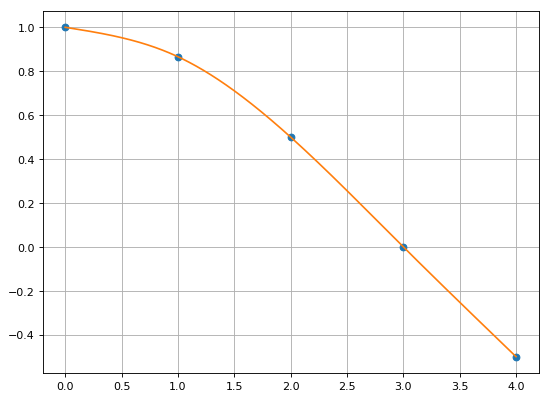

In [267]:
x_arr = np.arange(0, 4, 0.001) 
y_spline = [spline(x, y, i) for i in x_arr] 
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x, y, 'o', x_arr, y_spline) 
plt.grid(True)
plt.show()